<a href="https://colab.research.google.com/github/SumitAwagan123/hotel-booking-analysis-/blob/main/Sumit_Awagan_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# importing pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


In [ ]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing CSV file from google drive
df=pd.read_csv('/content/drive/MyDrive/Hotel booking system project /Copy of Hotel Bookings.csv')

# Importing information about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Checking the null value in data

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Removing company and agent columns

In [ ]:
df.drop(['company','agent'],inplace=True,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Adding null value to children column

In [ ]:
df['children'].fillna(df['children'].median(),inplace=True)


In [ ]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

## Adding null value to country column

In [ ]:
df.fillna({'country':0},inplace=True)


In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# **Que) The best time of year to book a hotel room?**

Text(0.5, 1.0, 'month Wise bookings')

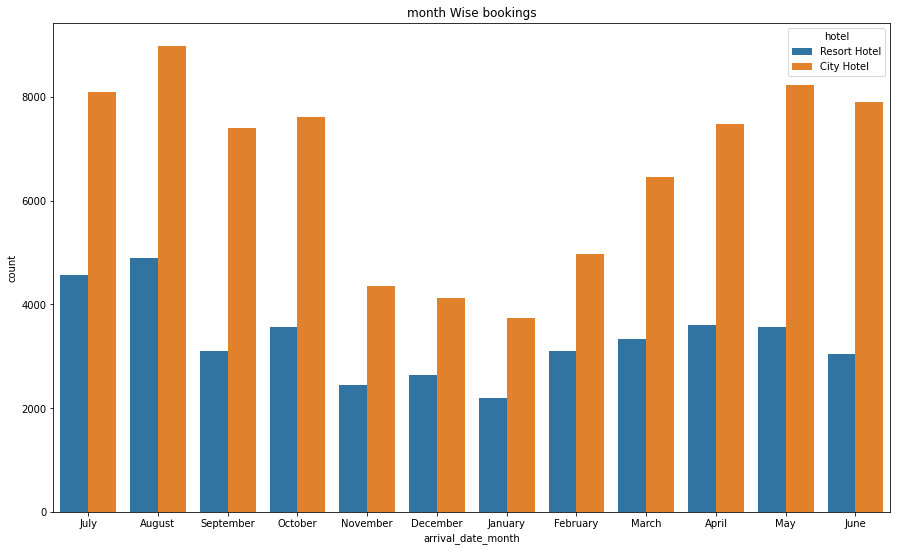

In [ ]:
# set plot size
plt.figure(figsize=(15,9))

#  plot with countplot
sns.countplot(x=df['arrival_date_month'],hue=df['hotel'])
plt.title("month Wise bookings")

# **Que) Monthly booking for three year 2015,2016,2017 ?**

In [ ]:
booking_year = df.groupby(['arrival_date_year', 'arrival_date_month'])['arrival_date_year'].count().unstack()

In [ ]:
suitable_booking_year

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
arrival_date_year,,,,,,,,,,,,
2015,NaN,3889.0,2920.0,NaN,NaN,2776.0,NaN,NaN,NaN,2340.0,4957.0,5114.0
2016,5428.0,5063.0,3860.0,3891.0,2248.0,4572.0,5292.0,4824.0,5478.0,4454.0,6203.0,5394.0
2017,5661.0,4925.0,NaN,4177.0,3681.0,5313.0,5647.0,4970.0,6313.0,NaN,NaN,NaN


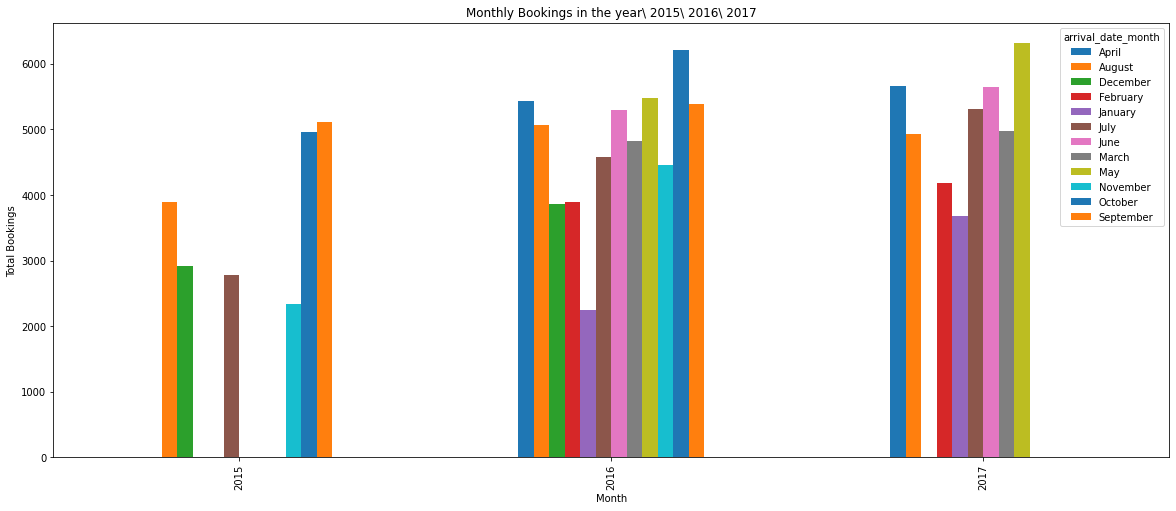

In [ ]:
booking_year.plot(kind='bar',figsize=(20,8))
plt.title('Monthly Bookings in the year\ 2015\ 2016\ 2017')
plt.ylabel('Total Bookings') 
plt.xlabel('Month') 
plt.show()

# **Que) The optimal length of stay in order to get the best daily rate?**

In [ ]:
stay = df.groupby(['lead_time', 'hotel']).agg('count').reset_index()  
stay = stay.iloc[:, :3]                                                
stay = stay.rename(columns={'is_canceled':'Number of stays'})  

Text(0.5, 0, 'hotel(days)')

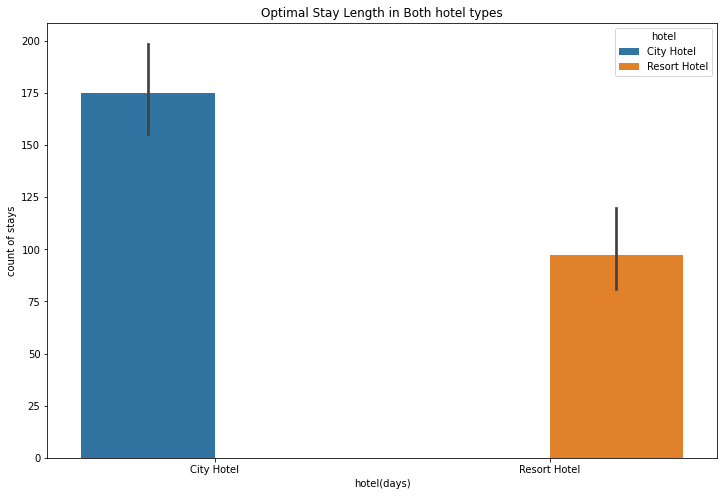

In [ ]:
# set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x='hotel',y='Number of stays',hue='hotel',data=stay)

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('hotel(days)')

# Questions form the database



## **Que1) Which month has the higesr booking of the year?**

In [ ]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})

# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)

# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,Counts
4,January,5929
3,February,8068
7,March,9794
0,April,11089
8,May,11791
6,June,10939
5,July,12661
1,August,13877
11,September,10508
10,October,11160


Text(0, 0.5, 'Number of bookings')

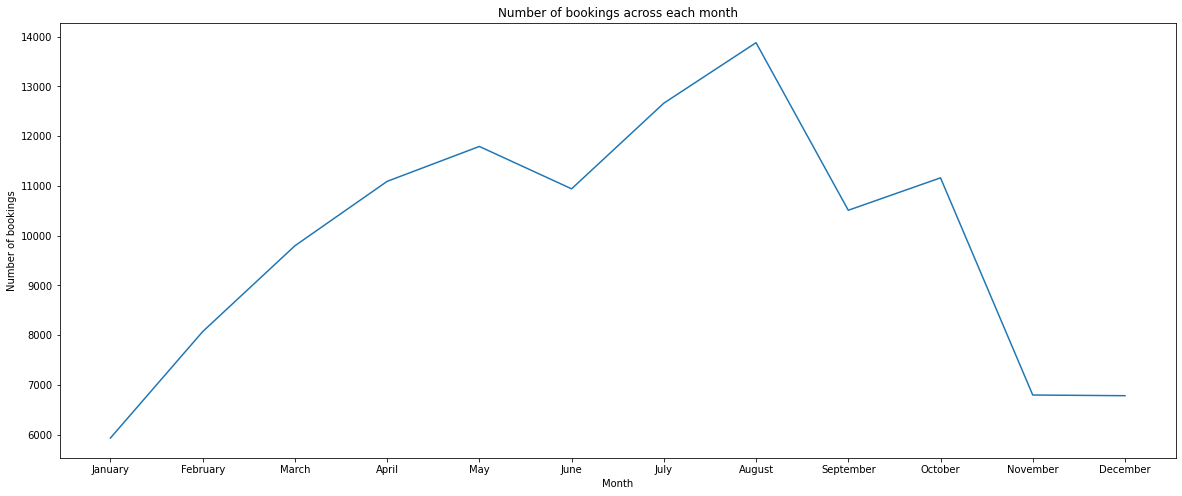

In [ ]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
plt.xlabel('Month')
plt.ylabel('Number of bookings')

## **Que2) Which type of hotel is mostly prefered by the guests?**

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

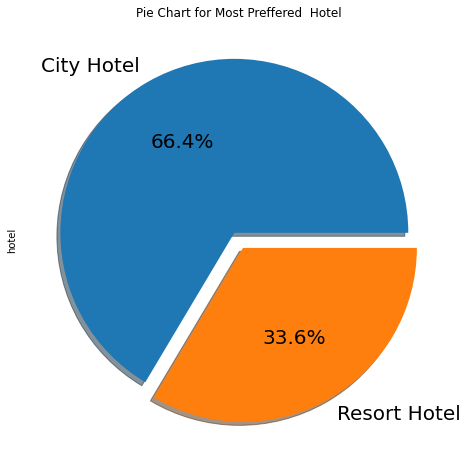

In [ ]:
# Visualizsing the by pie chart.
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05],autopct='%1.1f%%', shadow=True, figsize=(15,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

## **Que 3)Which country has the higest Arrivel?**





In [ ]:
df.country.value_counts(normalize=True)*100

PRT    40.698551
GBR    10.159142
FRA     8.723511
ESP     7.176480
DEU     6.103526
         ...    
DJI     0.000838
BWA     0.000838
HND     0.000838
VGB     0.000838
NAM     0.000838
Name: country, Length: 178, dtype: float64

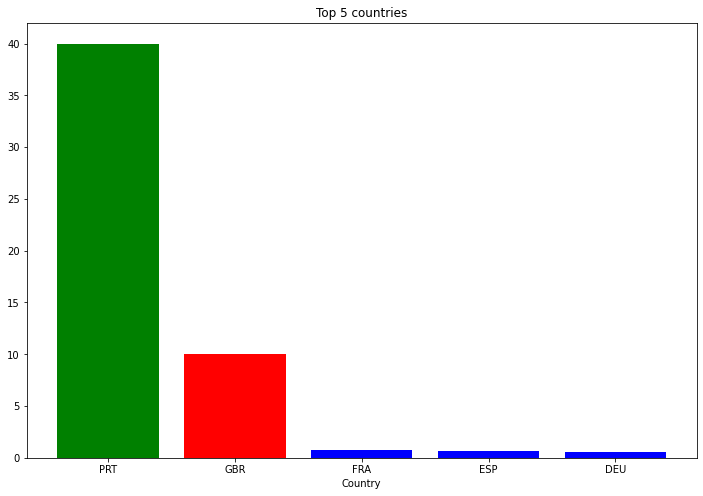

In [ ]:
x=['PRT','GBR','FRA','ESP','DEU']
h=[40,10,0.8,0.7,0.6]
plt.figure(figsize=(12,8))
plt.bar(x,h,color=["green","red","blue","blue","blue"])
plt.xlabel('Country')
plt.title("Top 5 countries")
plt.show()


## **Que4) Booking per year?**

In [ ]:
df.arrival_date_year.value_counts(normalize=True)


2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64

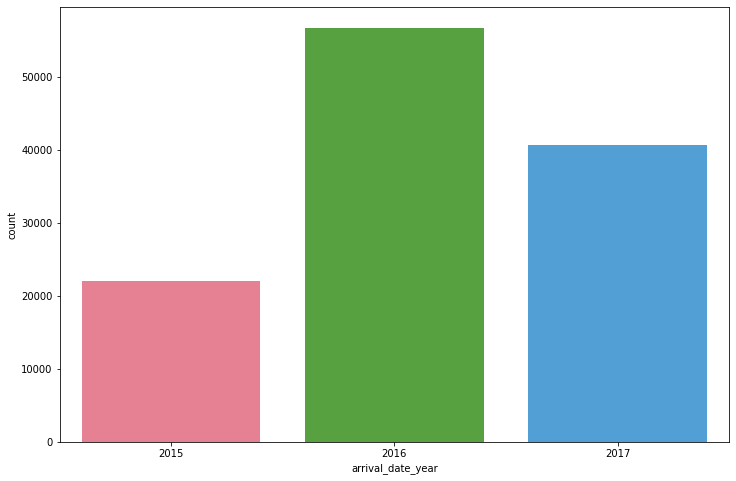

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['arrival_date_year'], palette='husl')
plt.show()

## **Que5) which mode of booking customer preffer?**

In [ ]:
modes = df.market_segment.value_counts()


In [ ]:
modes

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

<Figure size 1296x432 with 0 Axes>

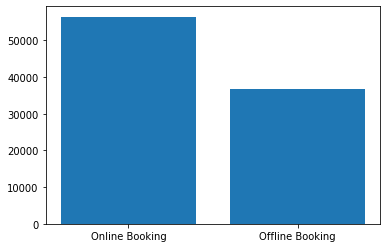

<Figure size 1296x432 with 0 Axes>

In [ ]:
onlineTa = df[df.market_segment=='Online TA']
mode = ["Online Booking", "Offline Booking"]
mode_count = [modes["Online TA"],modes["Offline TA/TO"]+modes["Direct"]]
plt.bar(mode,mode_count)



Based on the exploration of Data we can say that:

*.During Summer Season the hotels are expected to get more no of bookings than any other seasons. So, if Customers want to enjoy privacy can book in remaining seasons. Majority of the Bookings happen through online as it is easy and efficient way.
